In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor,NearestCentroid
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
df = pd.read_csv('/content/ADANIENT.NS.csv')

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-01,2018.000000,2049.000000,2013.050049,2043.650024,2042.781616,1267111
1,2022-04-04,2050.000000,2075.500000,2032.000000,2065.850098,2064.972168,1334265
2,2022-04-05,2078.000000,2189.800049,2067.600098,2139.850098,2138.940918,4970260
3,2022-04-06,2153.750000,2182.850098,2124.199951,2160.000000,2159.082275,2259018
4,2022-04-07,2165.949951,2214.949951,2081.250000,2099.050049,2098.158203,3499044
...,...,...,...,...,...,...,...
243,2023-03-23,1794.000000,1834.000000,1780.000000,1794.000000,1794.000000,4108804
244,2023-03-24,1796.000000,1823.000000,1695.250000,1740.650024,1740.650024,6187968
245,2023-03-27,1740.650024,1757.400024,1682.000000,1723.050049,1723.050049,5053055
246,2023-03-28,1727.949951,1733.000000,1573.000000,1600.849976,1600.849976,8144878


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
print(df['High'].dtype)

float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [18]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Univariate Analysis

In [19]:
#Boxplot

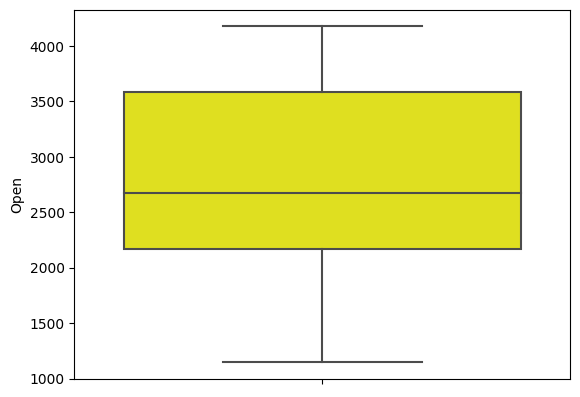

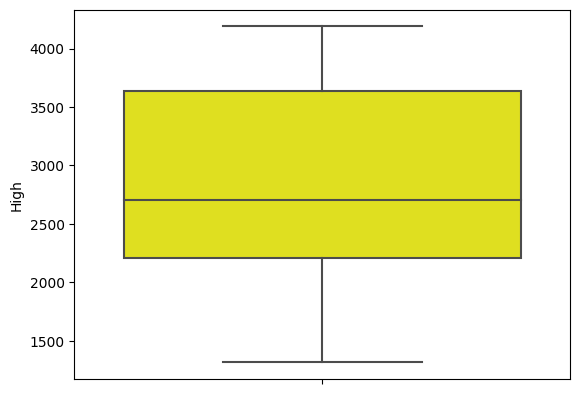

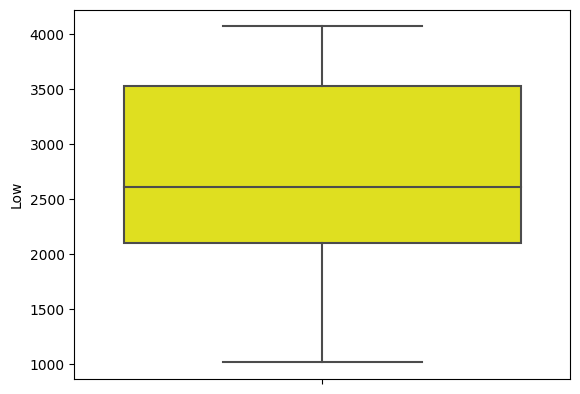

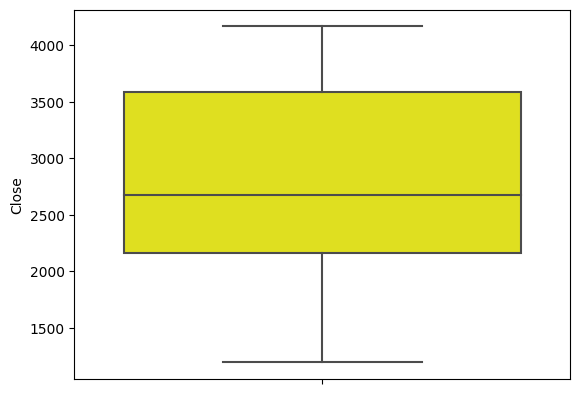

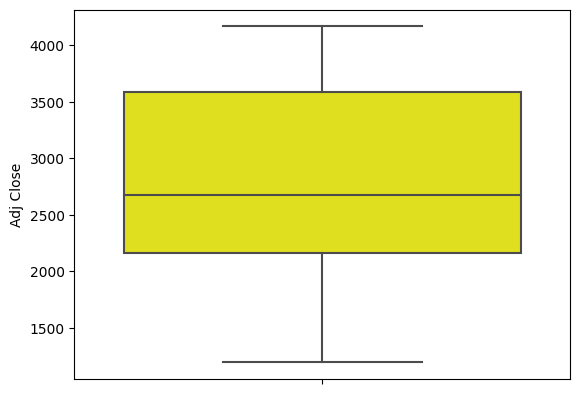

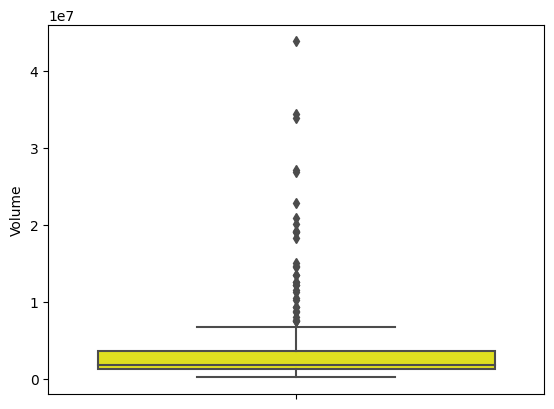

In [20]:
for i in df.columns:
    if df[i].dtype != 'object':
      sns.boxplot(y = df[i], color = 'yellow')
      plt.show()

In [21]:
def outlier_limit(col):
  Q3,Q1 = np.nanpercentile(col, [75,25]) #used to compute the nth percentile of the given data (array elements) along the specified axis and ignores nan values
  IQR = Q3 - Q1
  UL = Q3+1.5*IQR
  IL = Q1 - 1.5*Q1
  return UL, IL

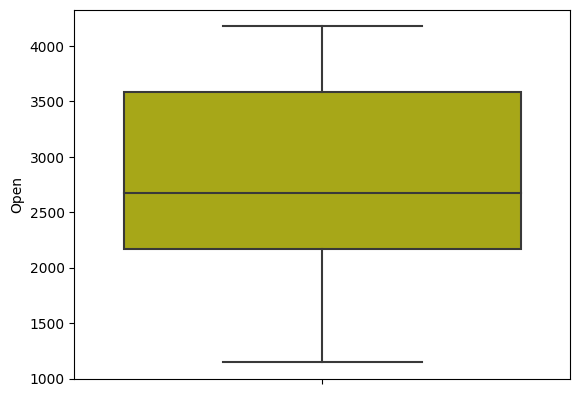

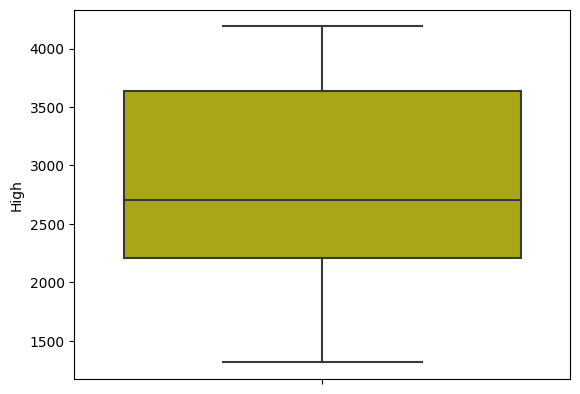

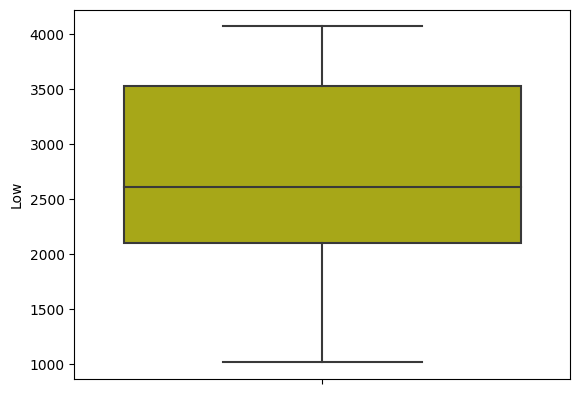

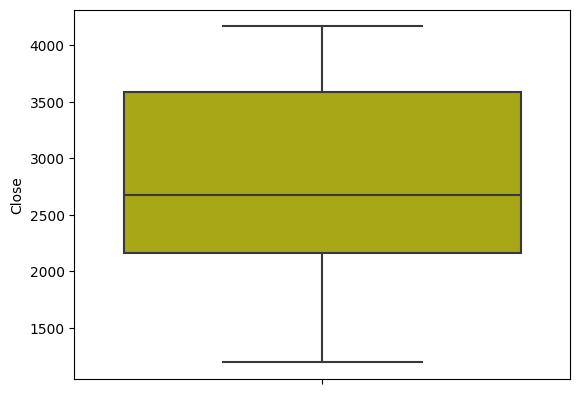

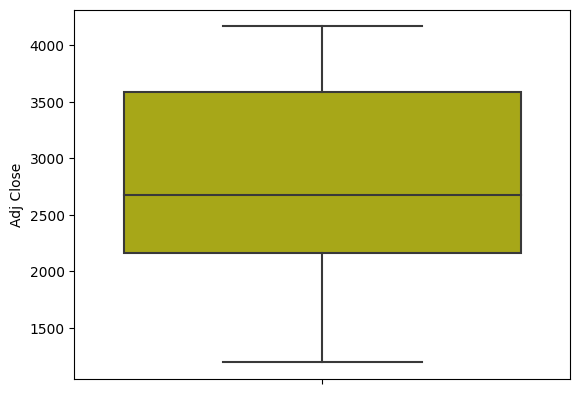

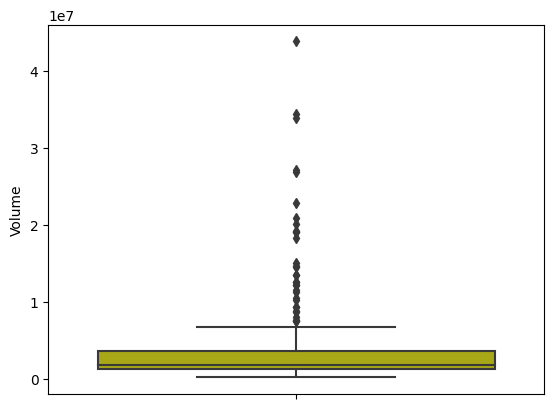

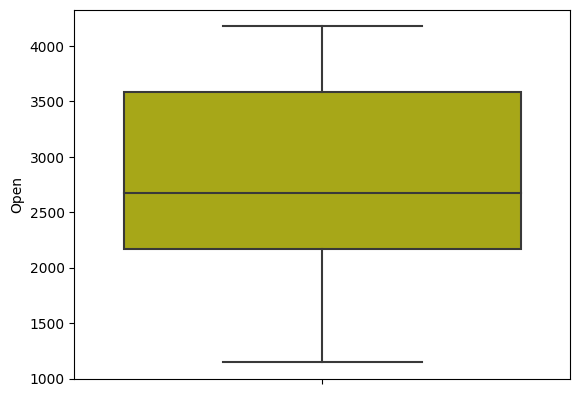

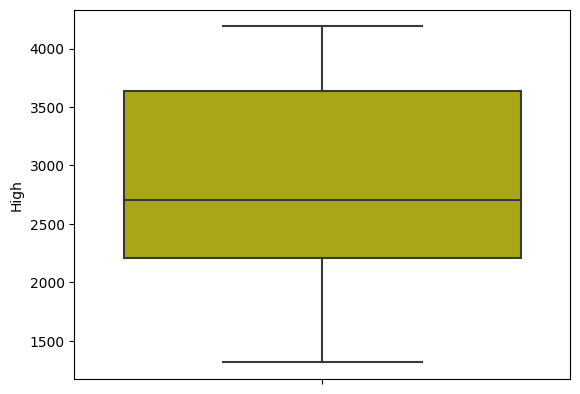

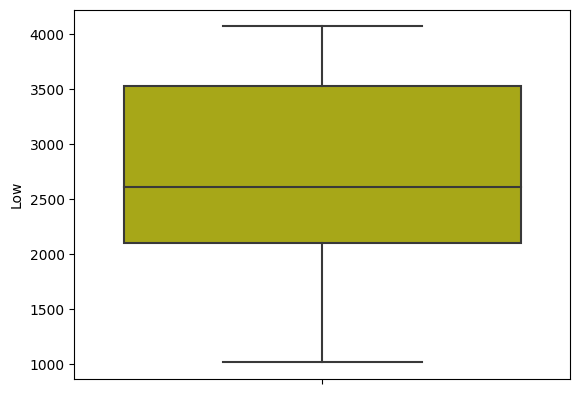

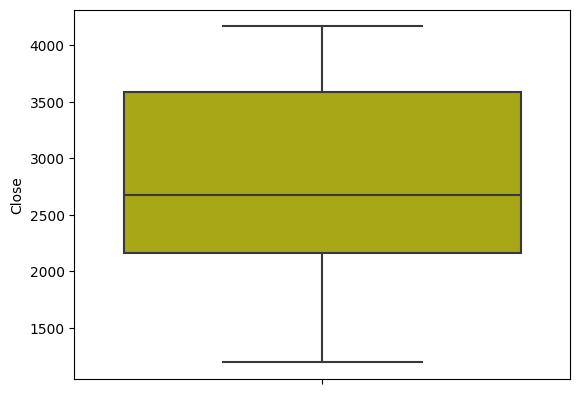

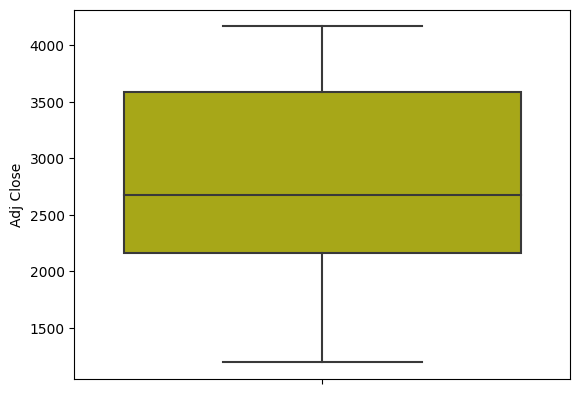

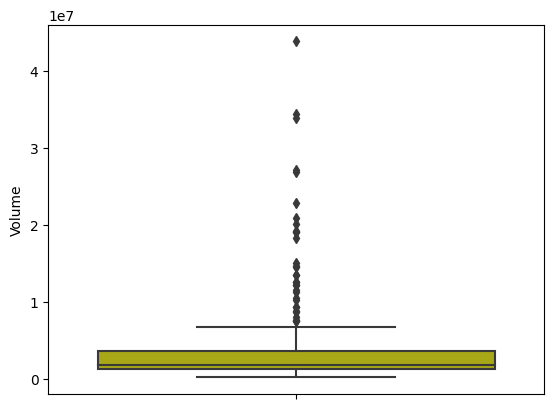

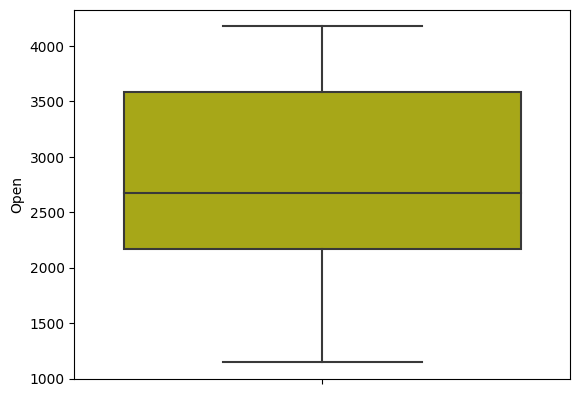

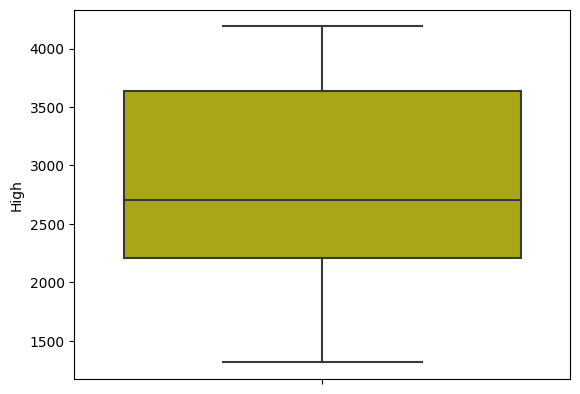

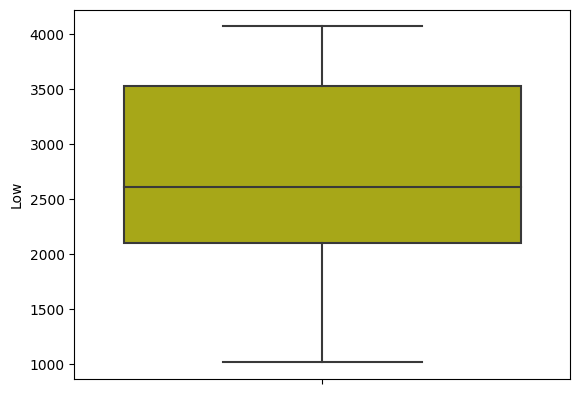

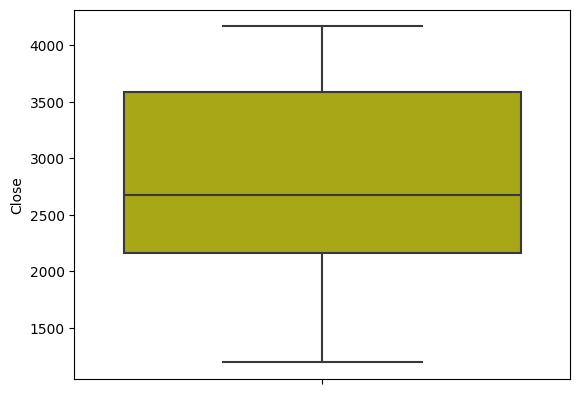

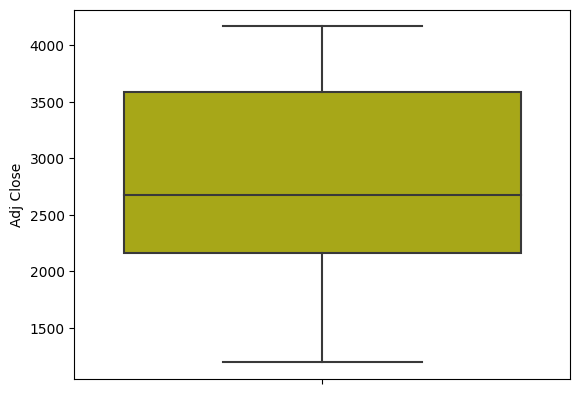

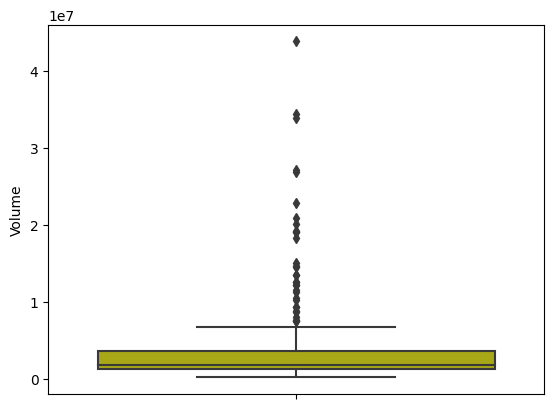

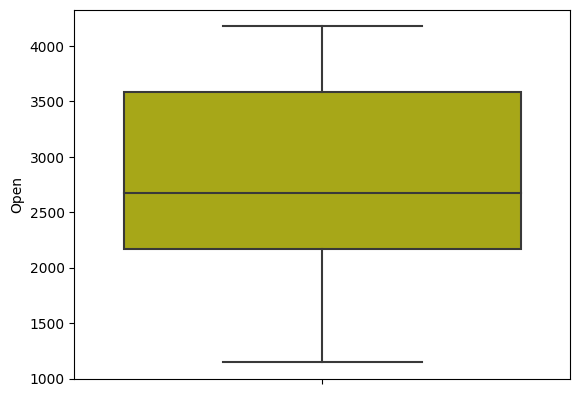

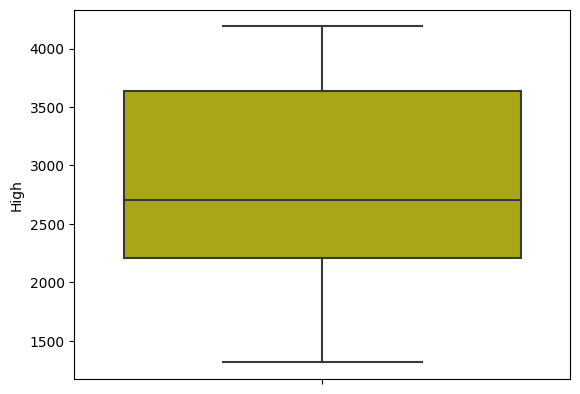

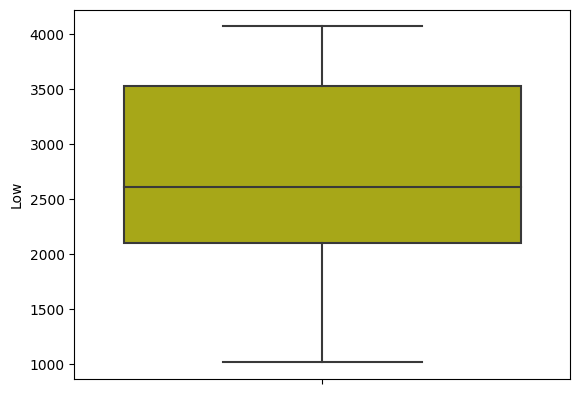

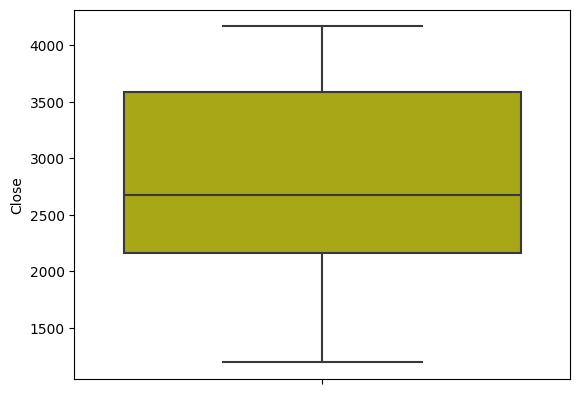

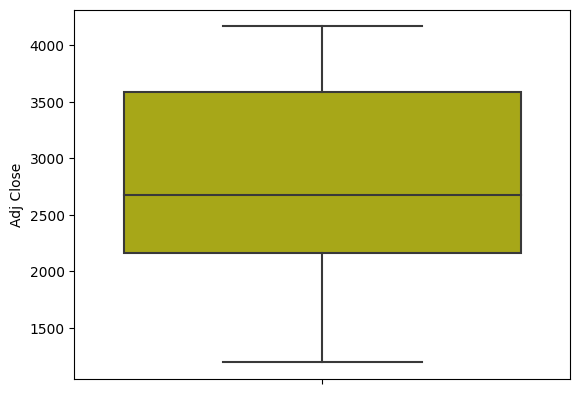

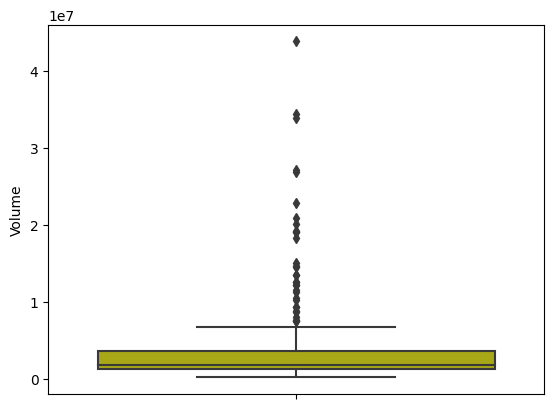

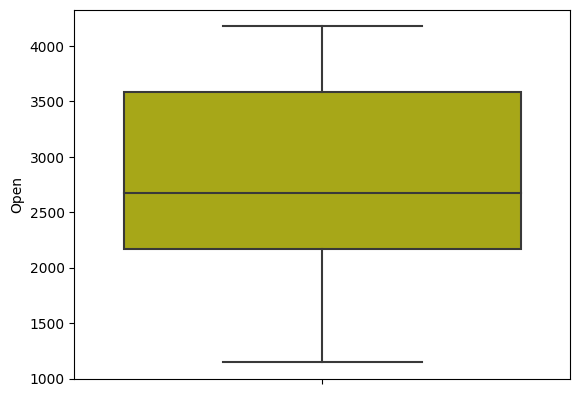

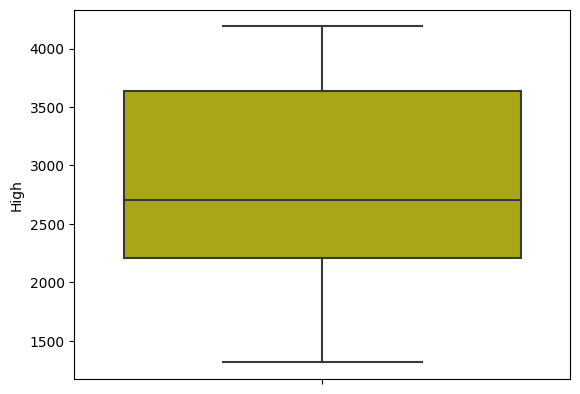

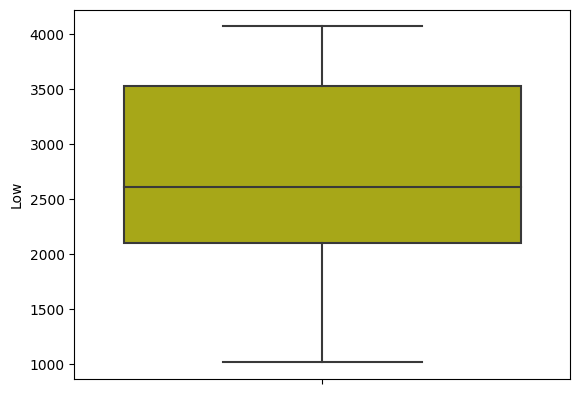

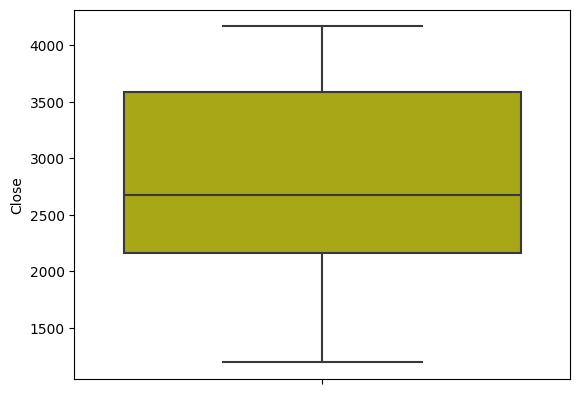

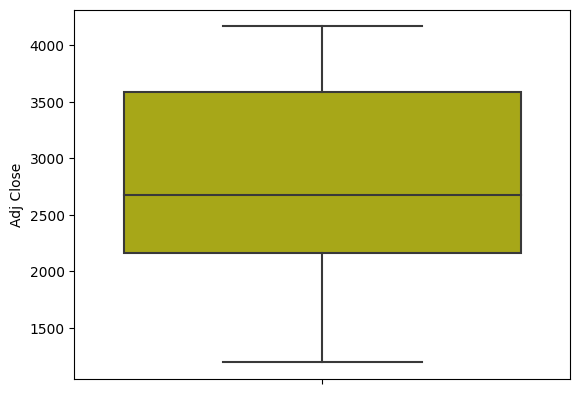

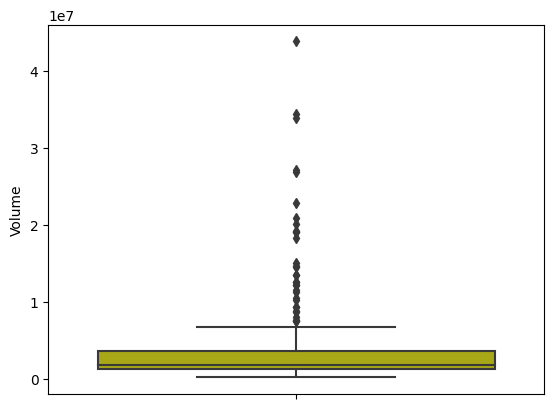

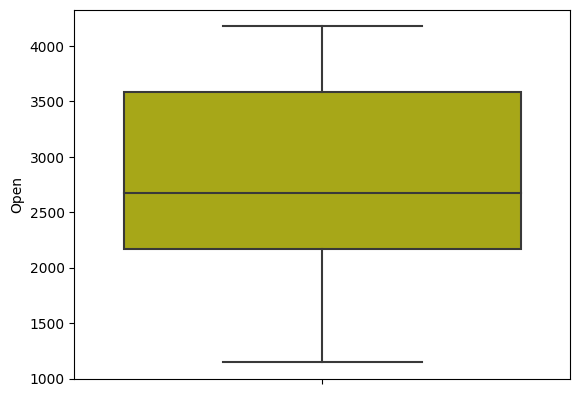

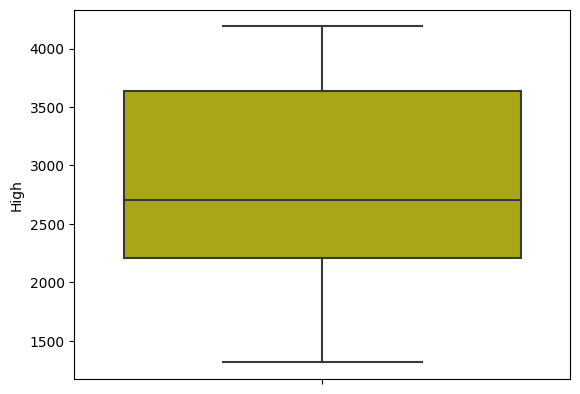

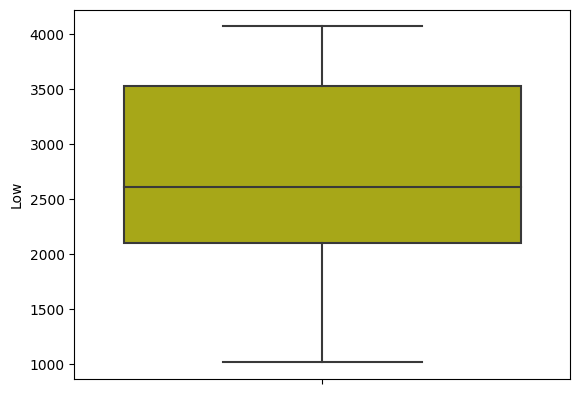

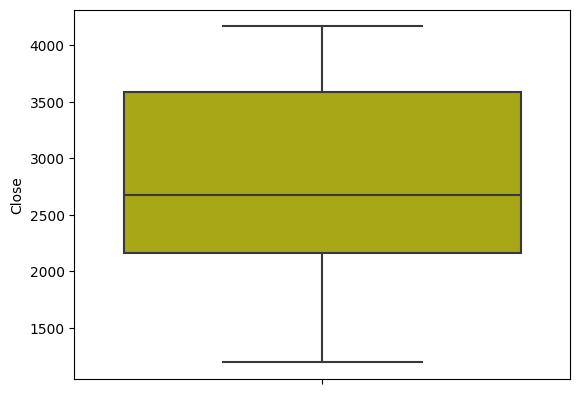

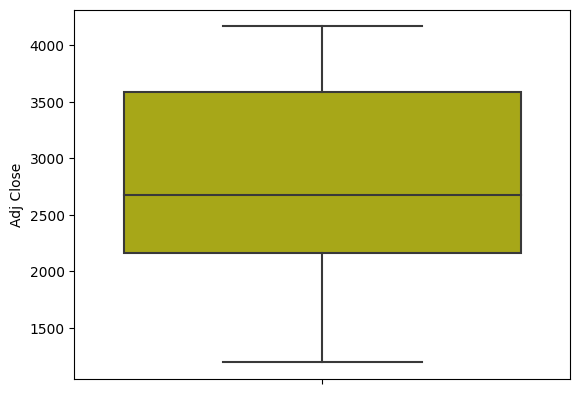

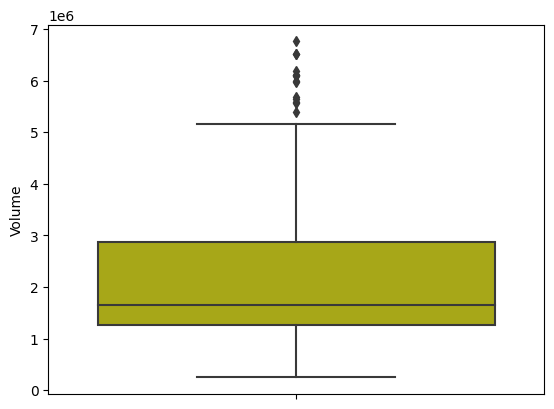

In [28]:
for column in df.columns:
  if df[column].dtype != 'object':
    UL,LL = outlier_limit(df[column])
    df[column] = np.where ((df[column]>UL) | (df[column]<LL), np.nan, df[column])
    for i in df.columns:
      if df[i].dtype != 'object':
       sns.boxplot(y=df[i],color = 'y')
       plt.show()

In [9]:
df.dropna(inplace = True)

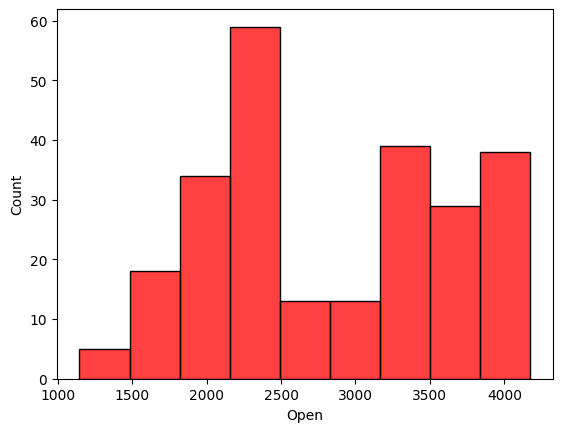

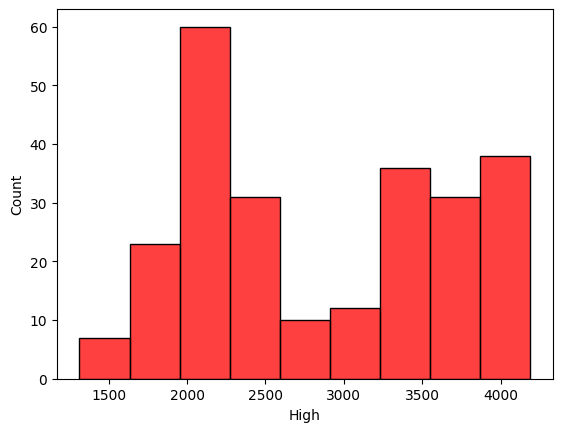

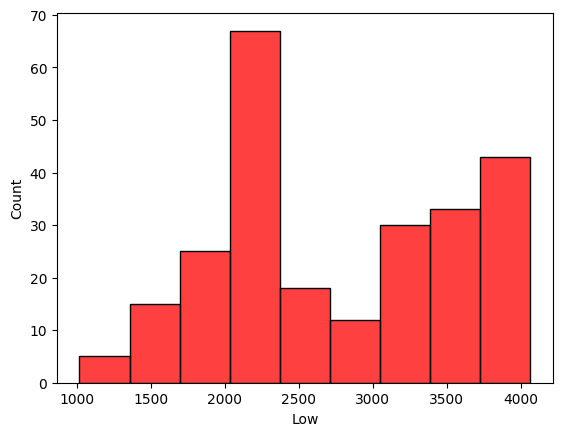

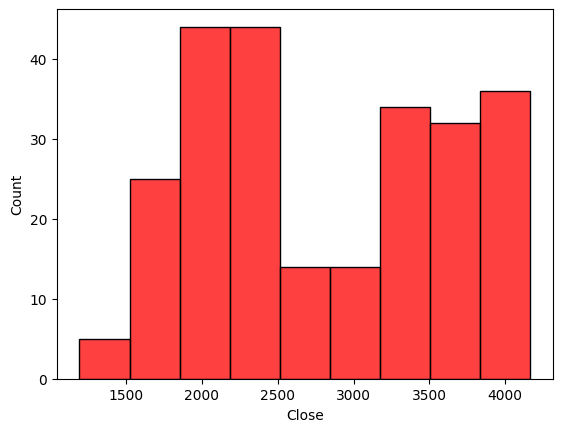

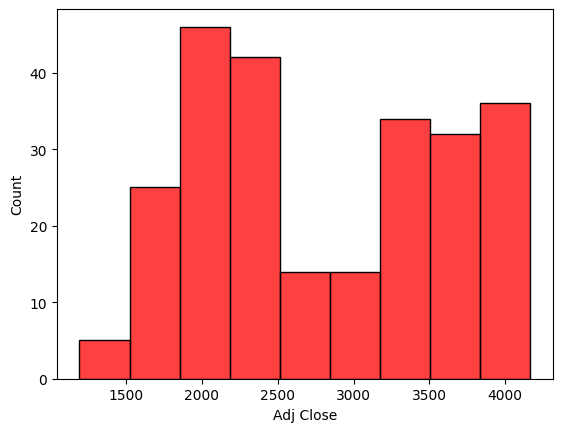

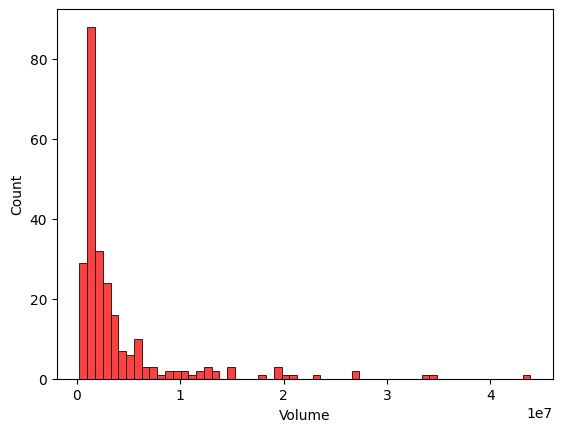

In [10]:
#hisplot
for i in df.columns:
  if df[i].dtype != 'object':
    sns.histplot(x=df[i],color = 'red')
    plt.show()

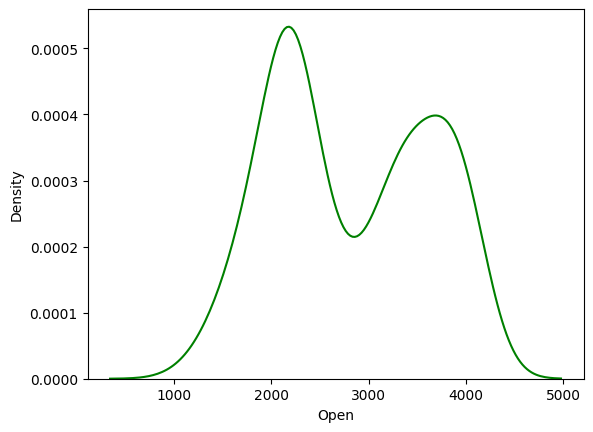

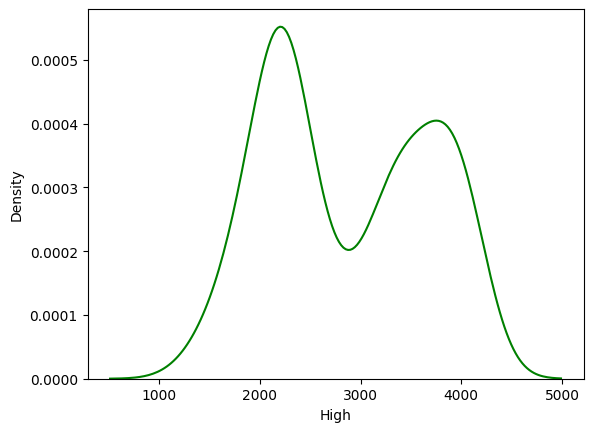

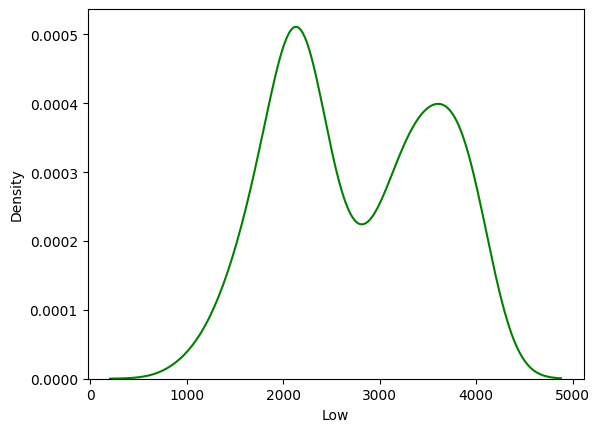

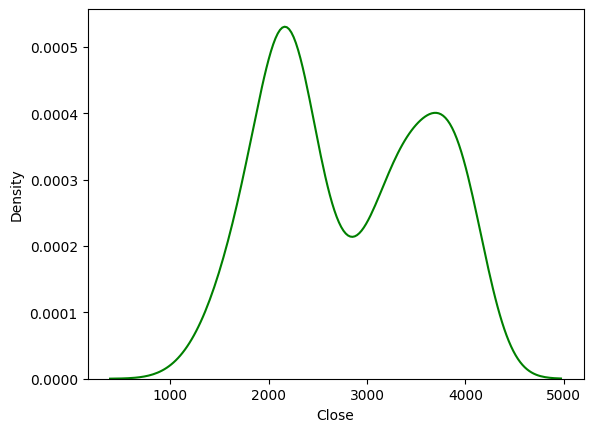

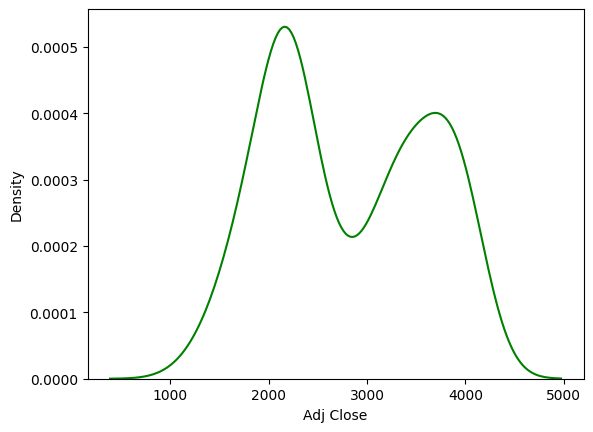

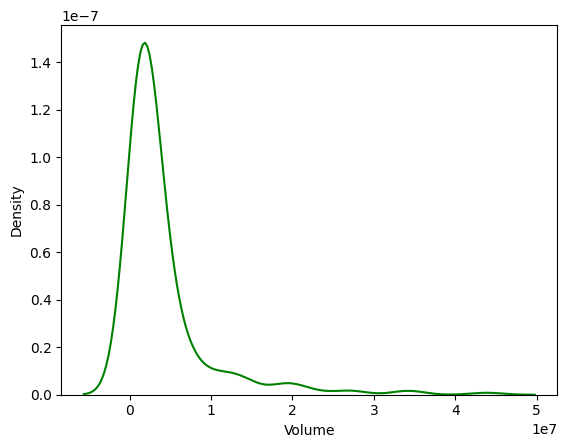

In [11]:
#kdeplot
for i in df.columns:
  if df[i].dtype != "object":
    sns.kdeplot(x = df[i], color = 'green')
    plt.show()

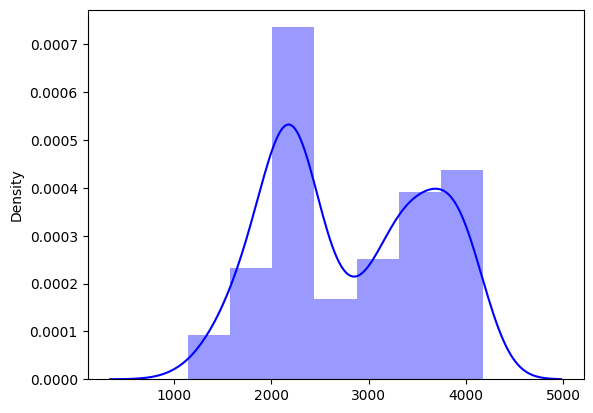

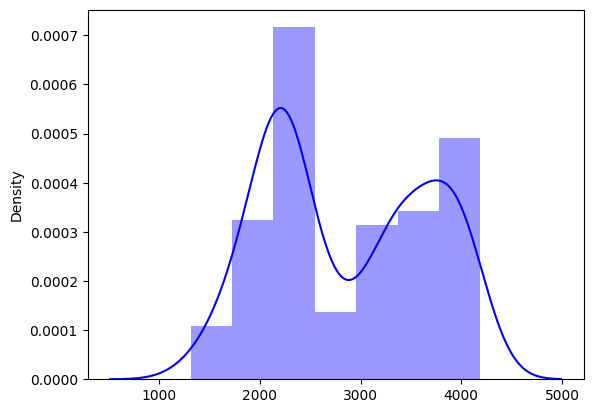

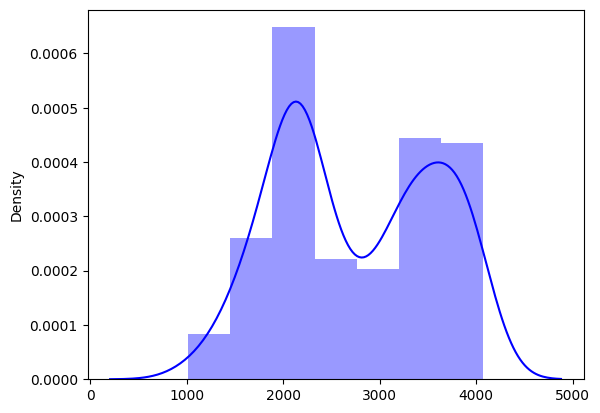

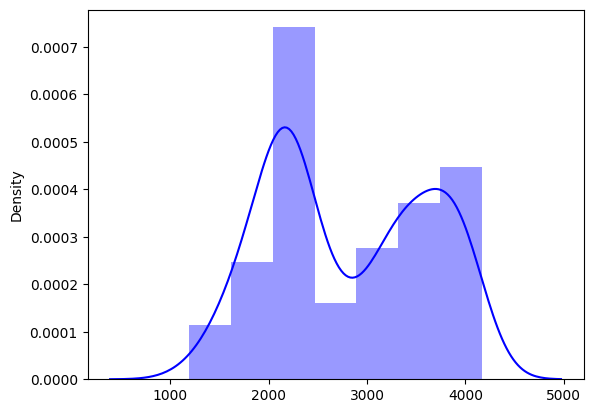

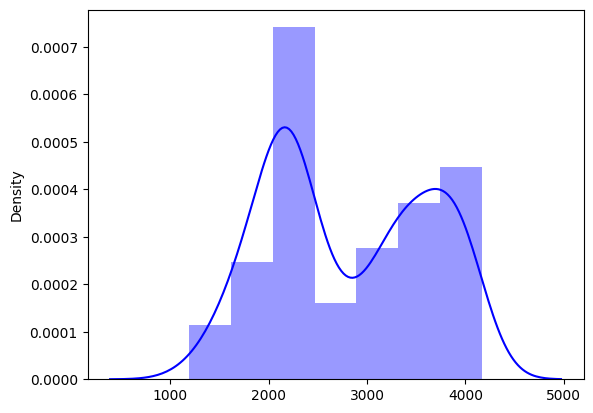

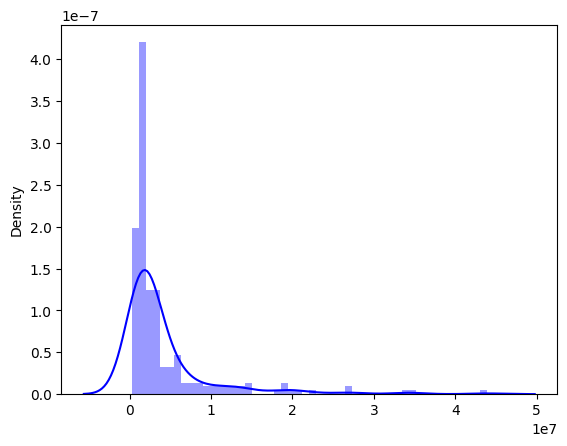

In [14]:
#Distplot
for i in df.columns:
  if df[i].dtypes != "object":
    sns.distplot(x = df[i], color = 'blue')
    plt.show()

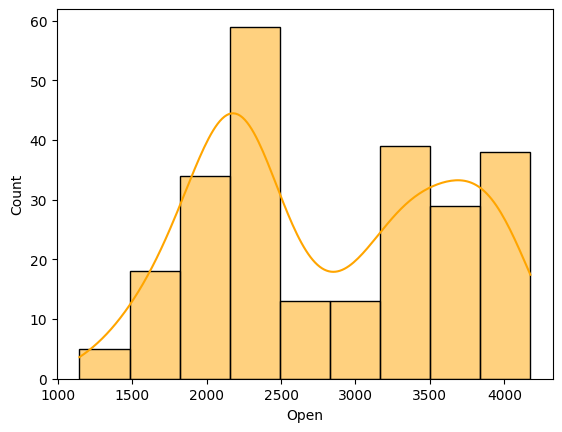

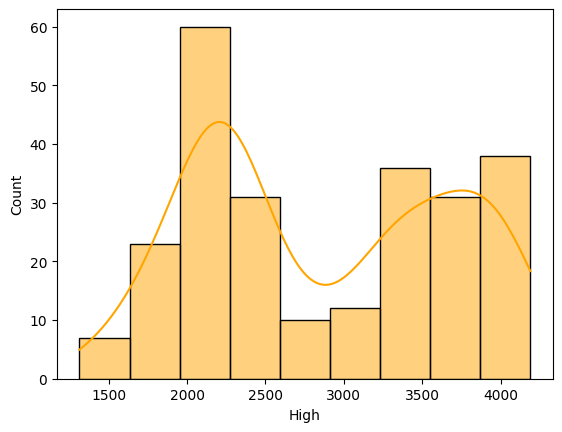

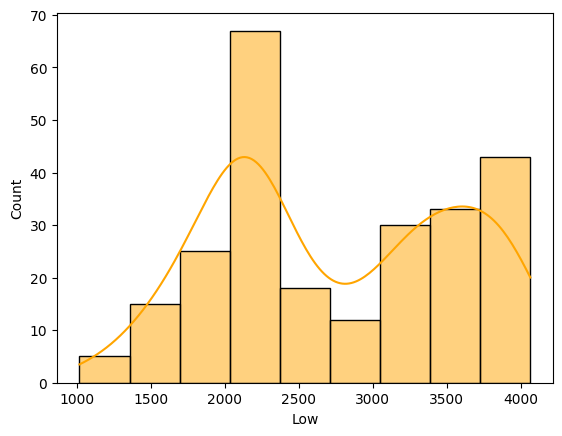

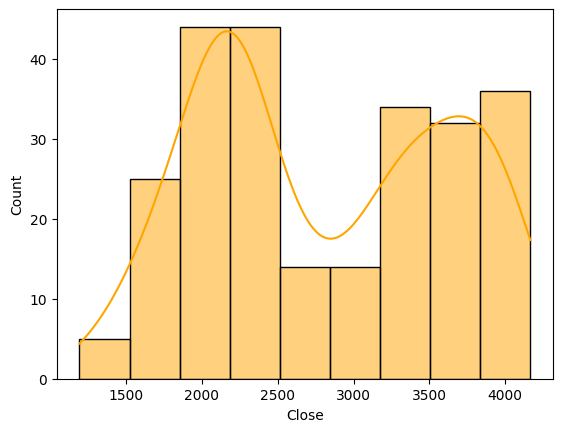

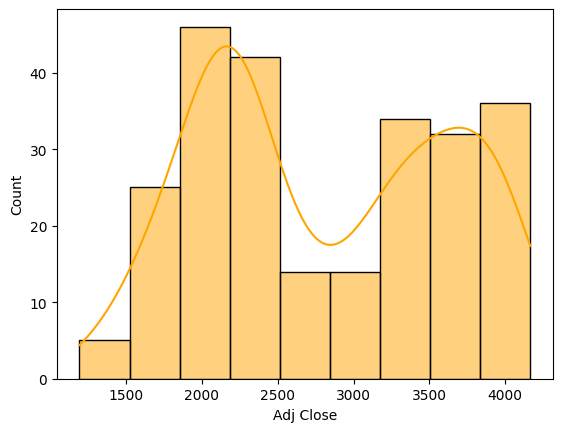

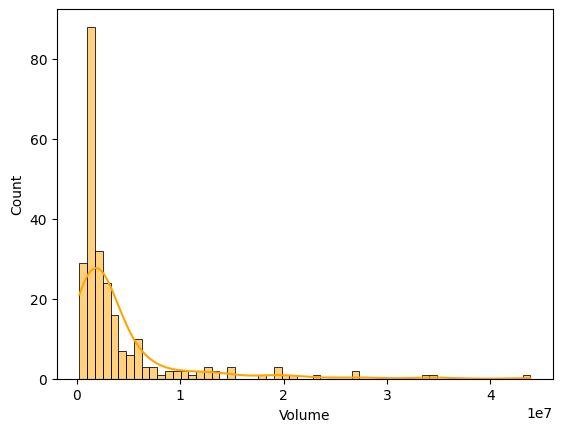

In [16]:
#Histplot
for column in df.columns:
  if df[column].dtypes != 'object':
    sns.histplot(x = df[column], kde=True, color='orange')
    plt.show()

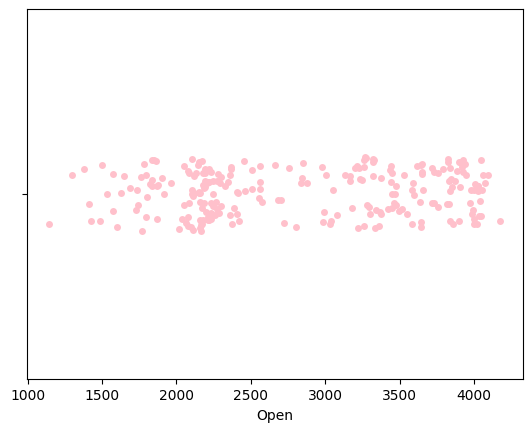

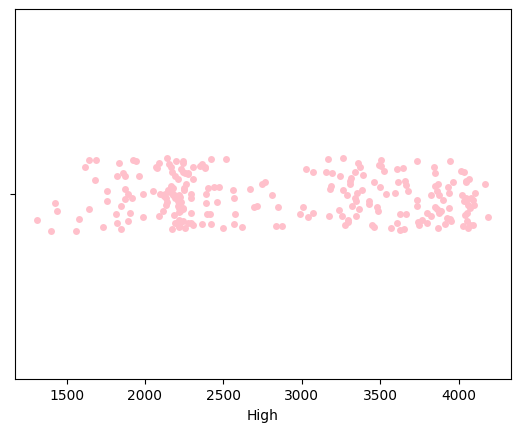

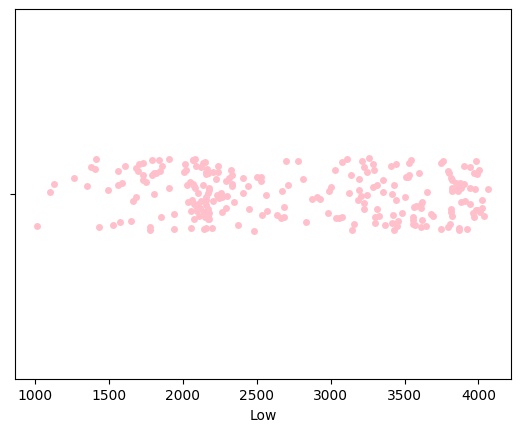

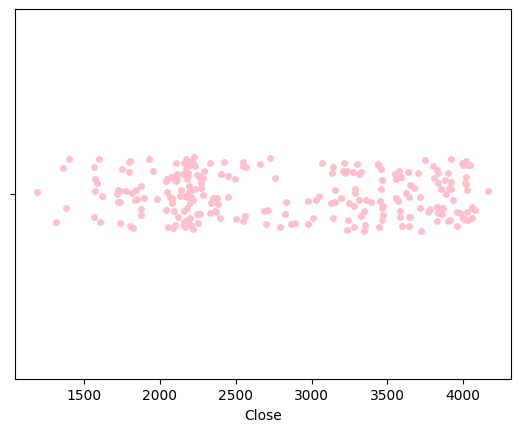

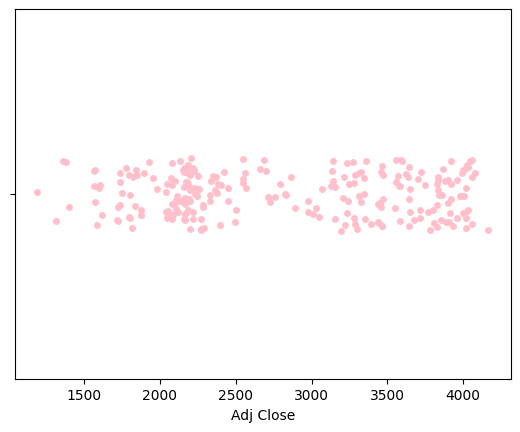

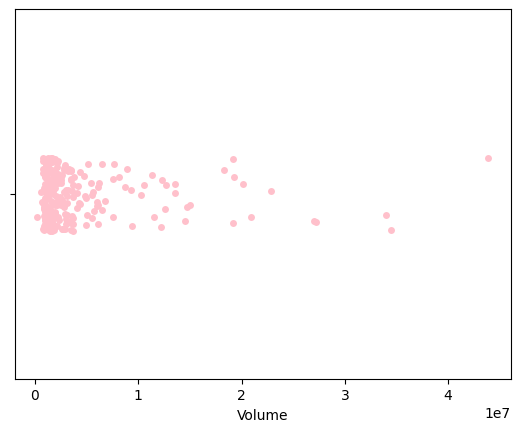

In [17]:
#Strplot
for i in df.columns:
  if df[i].dtypes != 'object':
    sns.stripplot(x = df[i], color='pink')
    plt.show()

**Multivariate** **Analysis**

<Axes: xlabel='High', ylabel='Low'>

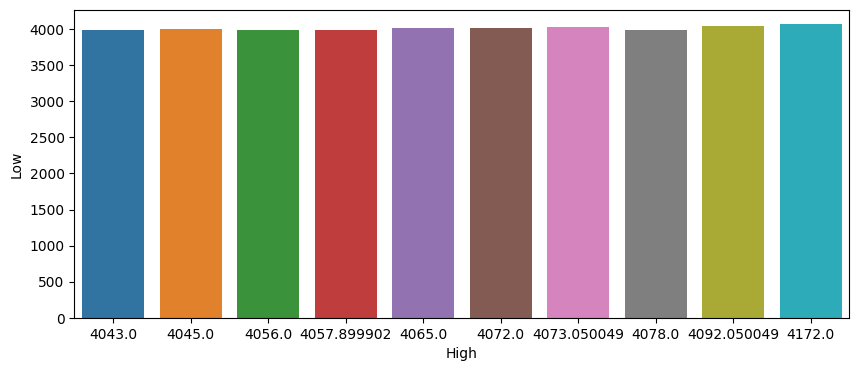

In [6]:
#Barplot
plt.figure(figsize=(10,4))
sns.barplot(x = 'High',y = 'Low', data=df.sort_values(by = 'Low',ascending=False)[: 10])

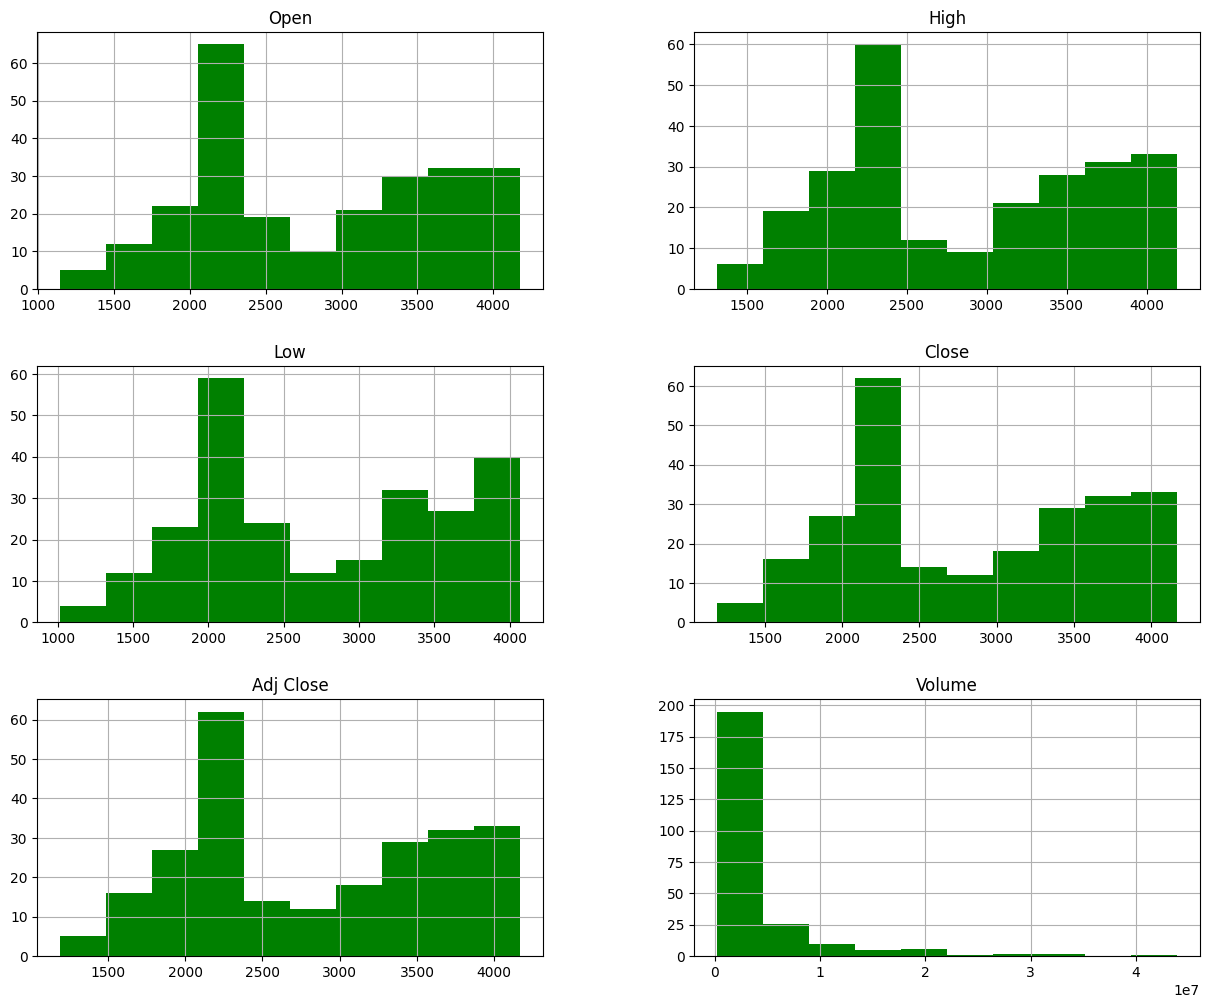

In [7]:
#histogram
df.hist(figsize=(15,12), color = 'green');
plt.show()

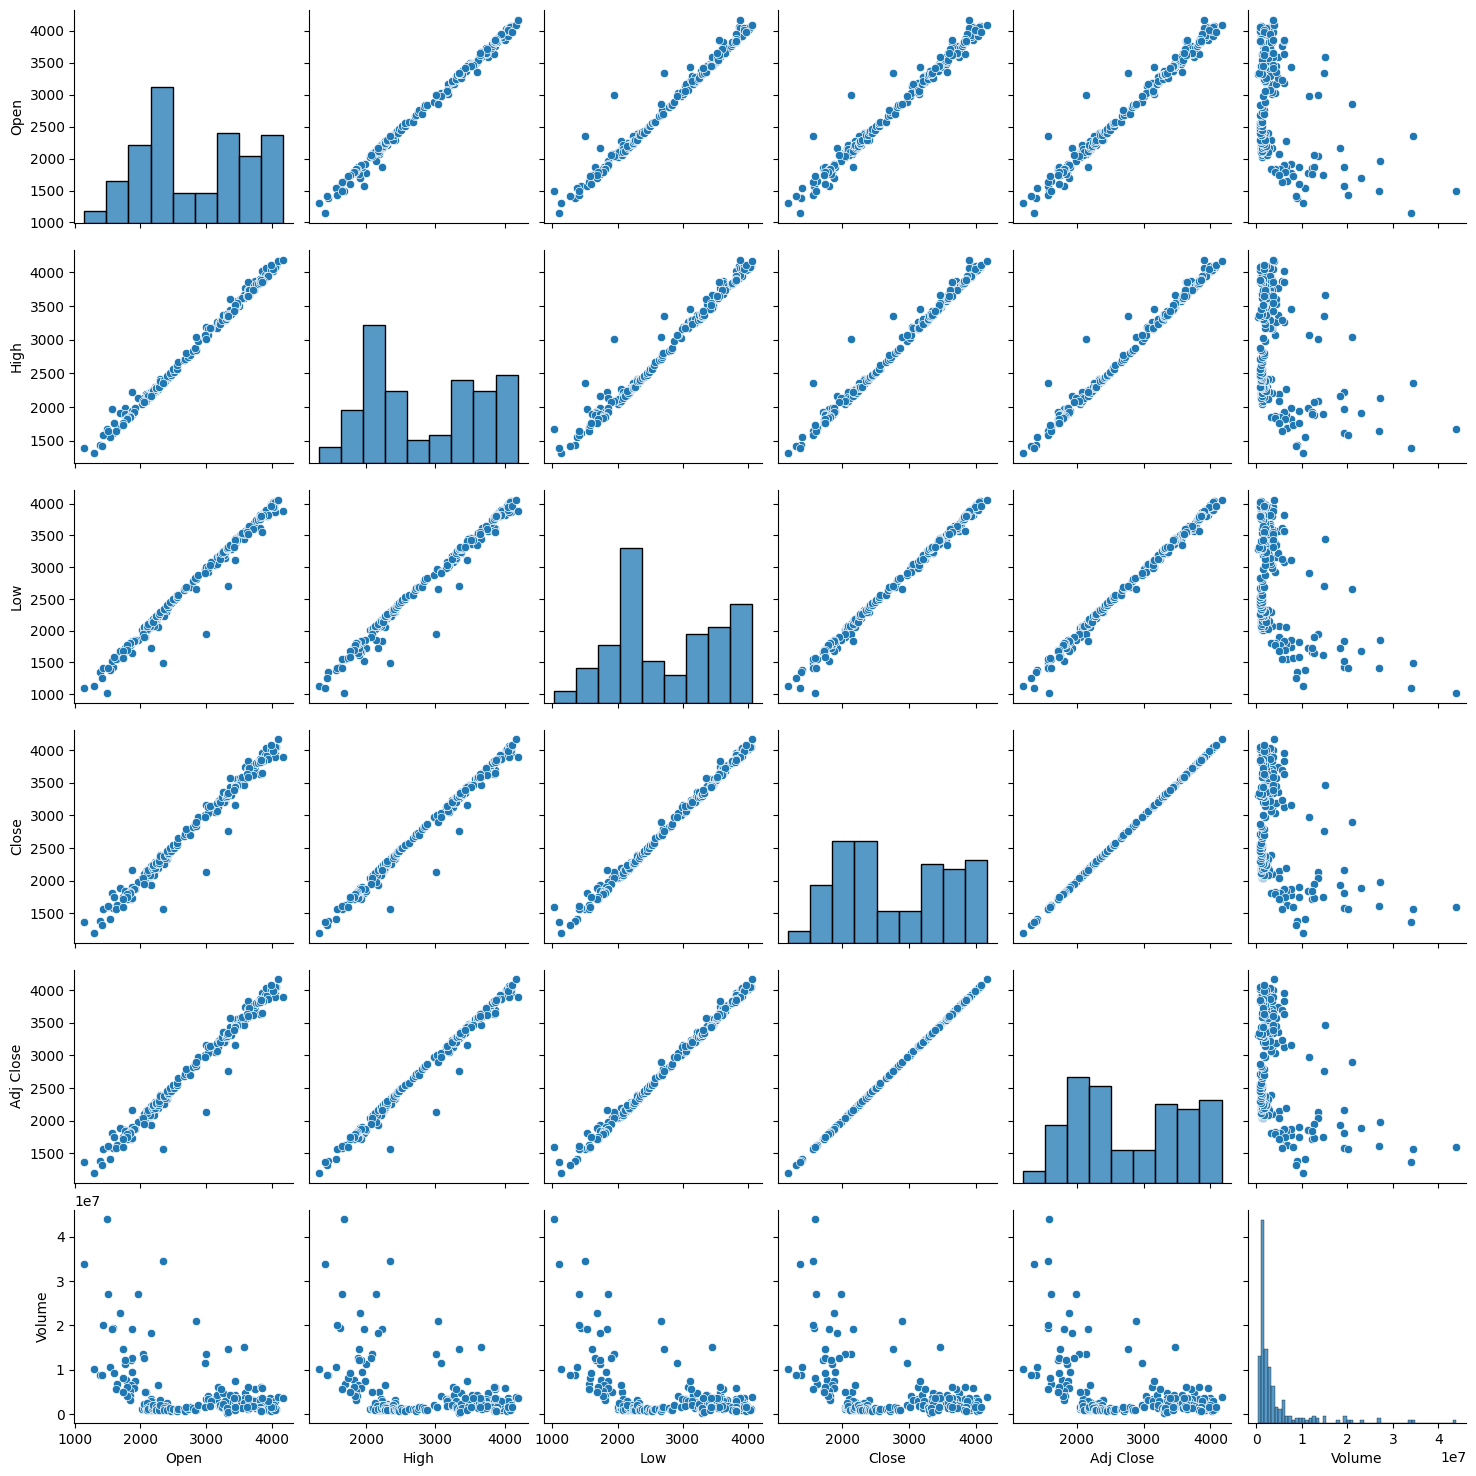

In [8]:
sns.pairplot(df)

<Axes: >

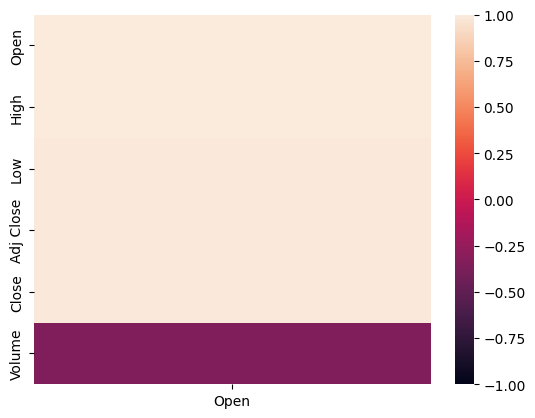

In [9]:
#heatmap
sns.heatmap(df.corr()[['Open']].sort_values(by='Open', ascending=False), vmin=-1, vmax=1,)

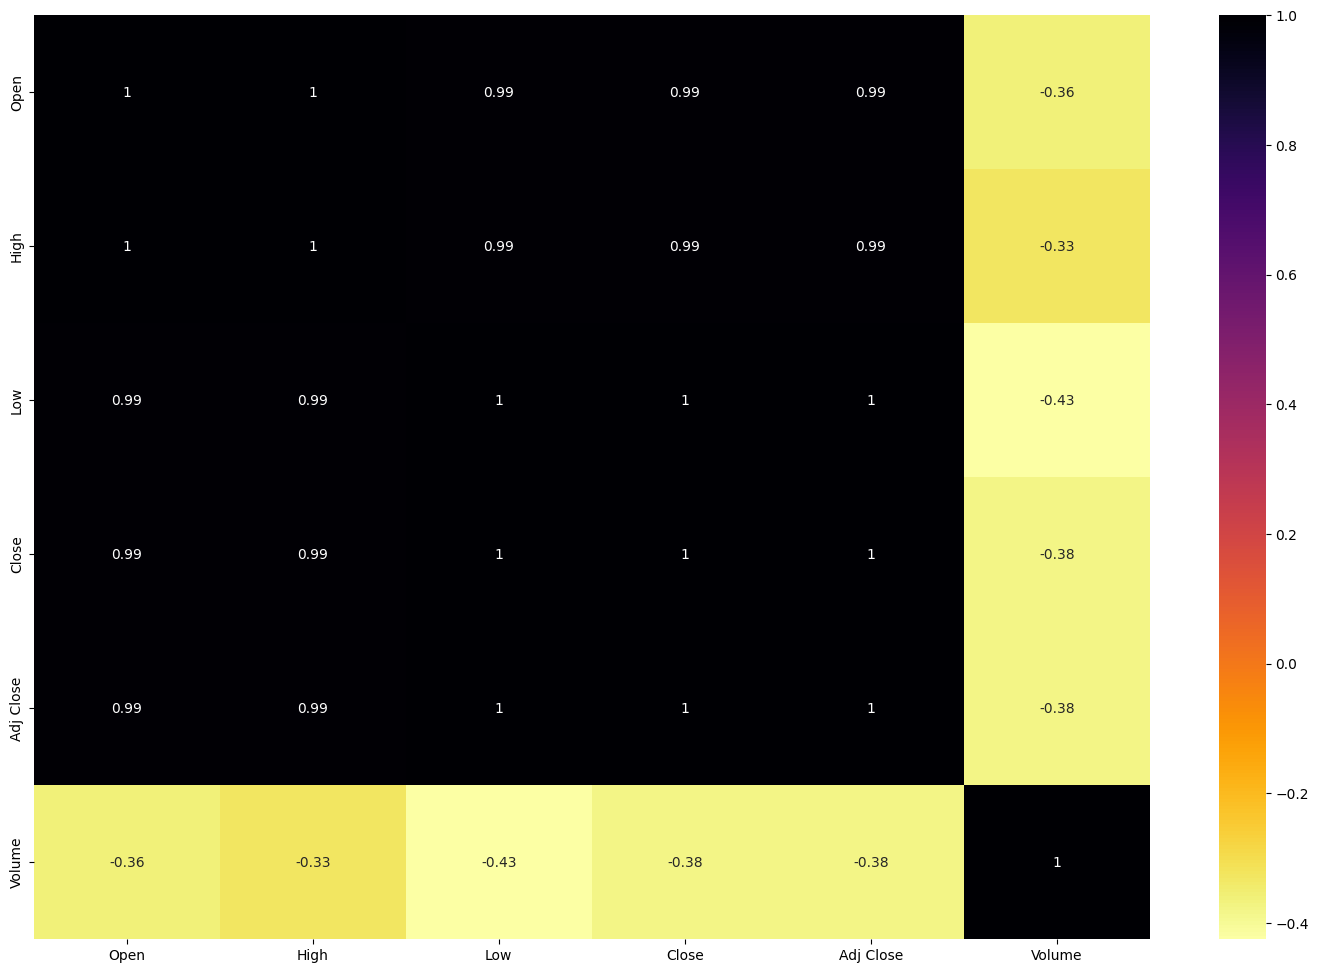

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='inferno_r')
plt.show()

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Model Selection and Training**

In [13]:
#seperating the dependent and independent variables
x = df[['High','Low','Close','Adj Close']].values
y=df[['Open']].values

In [14]:
sc=StandardScaler()

In [15]:
x=sc.fit_transform(x)

In [16]:
x

array([[-1.02337532e+00, -9.07856064e-01, -9.50000185e-01,
        -9.50506401e-01],
       [-9.90327205e-01, -8.84553529e-01, -9.22502407e-01,
        -9.23027324e-01],
       [-8.47783784e-01, -8.40776503e-01, -8.30843453e-01,
        -8.31430101e-01],
       [-8.56451057e-01, -7.71176321e-01, -8.05885089e-01,
        -8.06488590e-01],
       [-8.16419378e-01, -8.23991377e-01, -8.81379802e-01,
        -8.81932285e-01],
       [-8.64993805e-01, -7.94478856e-01, -7.92322102e-01,
        -7.92934754e-01],
       [-8.35063440e-01, -7.28997950e-01, -7.80864732e-01,
        -7.81485403e-01],
       [-8.11368568e-01, -7.33301859e-01, -7.60117604e-01,
        -7.60752257e-01],
       [-8.13675823e-01, -7.10614169e-01, -7.57021018e-01,
        -7.57657658e-01],
       [-7.85179500e-01, -7.31149904e-01, -7.14411808e-01,
        -7.15077296e-01],
       [-7.66473022e-01, -7.51624095e-01, -7.95604362e-01,
        -7.96214981e-01],
       [-8.25149068e-01, -7.24817130e-01, -7.76219853e-01,
      

**Corss Validation**

In [17]:
from sklearn.model_selection import cross_val_score
models={
 'LinearRegression':LinearRegression(),
 'Lasso':Lasso(),
 'Ridge':Ridge(),
 'GradientBoostingRegressor':GradientBoostingRegressor(),
 'AdaBoostRegressor':AdaBoostRegressor(),
 'RandomForestRegressor':RandomForestRegressor(),
 'KneghborsRegressor':KNeighborsRegressor()
}

In [18]:
for name, model in models.items():
 scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
 print('ss validaton model:{}'.format(name))
 rmse=np.sqrt(-scores)
 rmse_avarage=np.mean(rmse)
 print('AVARAGE RMSE:',rmse_avarage)
 print('*'*100)


ss validaton model:LinearRegression
AVARAGE RMSE: 34.614652286467575
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 48.08613664113195
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 49.684348472000885
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 73.89161082226806
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 105.470305916818
****************************************************************************************************
ss validaton model:RandomForestRegressor
AVARAGE RMSE: 73.78601738704633
*********************************************************************************************

Splitting into Training and Testing

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Model Building**

In [21]:
LR = LinearRegression()

In [22]:
LR.fit(x_train,y_train)

LinearRegression()

In [23]:
print("model trained with {}".format(LR))
training_score = LR.score(x_train, y_train)*100
testing_score = LR.score(x_test, y_test)*100
score = r2_score(y_test, LR.predict(x_test))*100
mae = mean_absolute_error(y_test, LR.predict(x_test))
mse = mean_squared_error(y_test, LR.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearRegression()
r2score:  99.88207356999219
training_score:  99.76464422183673
testing_score:  99.88207356999219
mae:  18.825007314386784
mse:  826.7631085945766
rmse_test:  28.7534886334611


**Evaluation**

In [24]:
y_pred = LR.predict(x)

In [25]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,2018.000000,2015.467012
1,2050.000000,2040.503991
2,2078.000000,2135.338347
3,2153.750000,2148.439372
4,2165.949951,2199.271206
...,...,...
243,1794.000000,1805.303524
244,1796.000000,1778.650674
245,1740.650024,1711.464076
246,1727.949951,1703.324331


**Visualizing the Prediction**

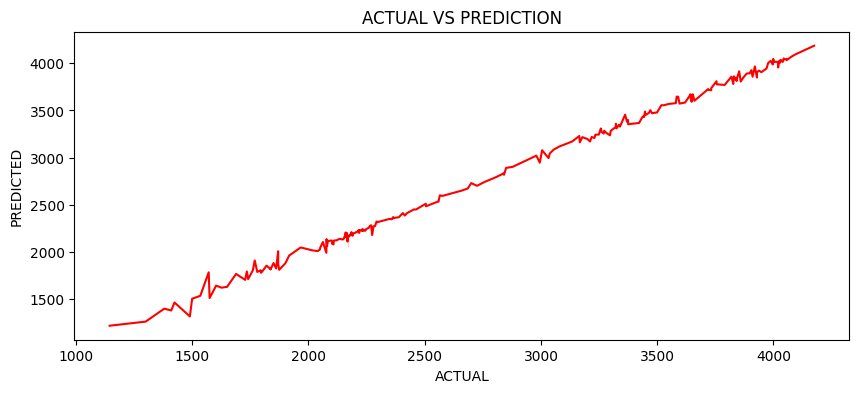

In [26]:
#Lineplot
plt.figure(figsize=(10,4))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT, color="red")
plt.title("ACTUAL VS PREDICTION")
plt.show()

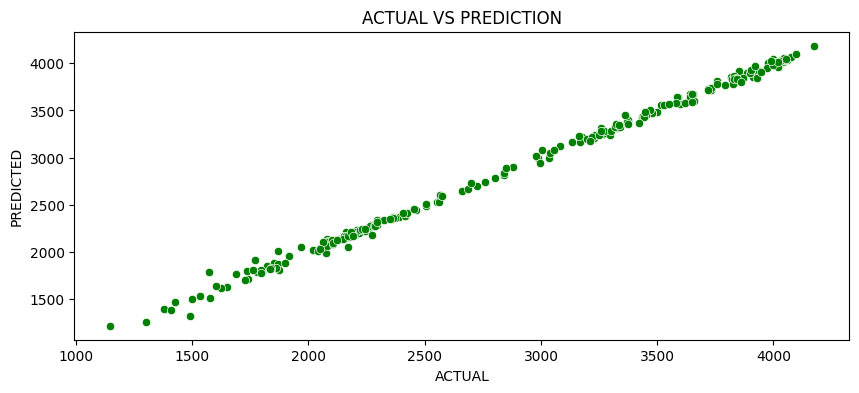

In [27]:
#Scatter Plot
plt.figure(figsize=(10,4))
sns.scatterplot(data = OUTPUT, x="ACTUAL", y = "PREDICTED",color="green")
plt.title("ACTUAL VS PREDICTION")
plt.show()

In [28]:
x

array([[-1.02337532e+00, -9.07856064e-01, -9.50000185e-01,
        -9.50506401e-01],
       [-9.90327205e-01, -8.84553529e-01, -9.22502407e-01,
        -9.23027324e-01],
       [-8.47783784e-01, -8.40776503e-01, -8.30843453e-01,
        -8.31430101e-01],
       [-8.56451057e-01, -7.71176321e-01, -8.05885089e-01,
        -8.06488590e-01],
       [-8.16419378e-01, -8.23991377e-01, -8.81379802e-01,
        -8.81932285e-01],
       [-8.64993805e-01, -7.94478856e-01, -7.92322102e-01,
        -7.92934754e-01],
       [-8.35063440e-01, -7.28997950e-01, -7.80864732e-01,
        -7.81485403e-01],
       [-8.11368568e-01, -7.33301859e-01, -7.60117604e-01,
        -7.60752257e-01],
       [-8.13675823e-01, -7.10614169e-01, -7.57021018e-01,
        -7.57657658e-01],
       [-7.85179500e-01, -7.31149904e-01, -7.14411808e-01,
        -7.15077296e-01],
       [-7.66473022e-01, -7.51624095e-01, -7.95604362e-01,
        -7.96214981e-01],
       [-8.25149068e-01, -7.24817130e-01, -7.76219853e-01,
      

**Conclusion**

**Based on the regression analysis performed on the Adani stock prediction,
the following conclusions can be drawn:**

Regression analysis plays a crucial role in understanding the relationship between independent variables (such as historical stock prices, trading volumes, economic indicators, or sector performance) and the dependent variable (Adani stock price). By examining this relationship, regression analysis provides valuable insights into how changes in the independent variables impact the stock price.

In addition, regression analysis offers statistical measures like coefficients and p-values to determine the significance of independent variables in explaining the variation in Adani stock price. A significant p-value indicates that the variable has a meaningful impact on the stock price.

Moreover, regression models can be used for predicting future Adani stock prices based on the identified relationships. By inputting values for the independent variables, the model can generate predictions, assisting investors and traders in making informed decisions.

To evaluate the performance of the regression model, various metrics such as R-squared, adjusted R-squared, and root mean squared error (RMSE) can be utilized. A higher R-squared value and a lower RMSE indicate a better fit of the model to the data.

It's important to consider the assumptions of regression analysis, including linearity, independence of errors, homoscedasticity, and normality of residuals, to ensure the validity of the regression model and the reliability of its predictions.

However, regression analysis does have limitations. It assumes a linear relationship between variables and may not capture all the factors that influence stock prices. Factors like market sentiment, news events, or regulatory changes should also be taken into account alongside regression analysis. It is advisable to combine regression analysis with other techniques, conduct thorough validation, and consider additional qualitative factors for making well-informed investment decisions.

It's worth noting that stock prediction is a challenging task, and relying solely on regression analysis may not provide precise and accurate predictions. Therefore, it is important to exercise caution, employ a comprehensive approach, and consider all available information for making sound investment decisions.
